<a href="https://colab.research.google.com/github/Bosy-Ayman/DataGovernance/blob/main/Assignment_DG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

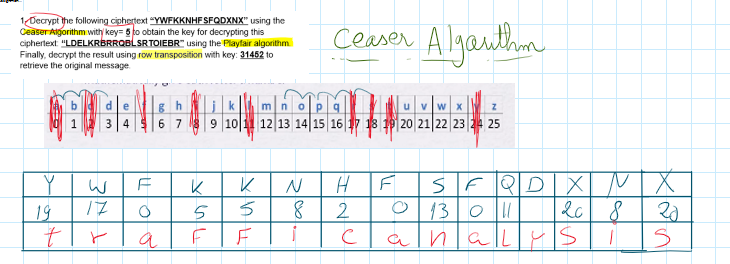

In [173]:
def decrypt_caesar(ciphertext):
    decrypted_text = ""
    for char in ciphertext:
        if char.isalpha():
            decrypted_text += chr(((ord(char) - 65 - 5) % 26) + 65)
        else:
            decrypted_text += char
    return decrypted_text



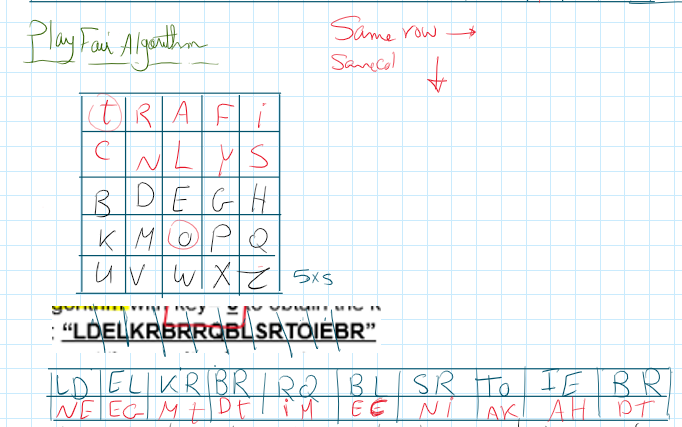

In [174]:
def decrypt_playfair(ciphertext, key):
    key = key.replace("J", "I")
    key_matrix = [['' for _ in range(5)] for _ in range(5)]

    used_letters = set()
    row = col = 0
    for letter in key:
        if letter not in used_letters:
            key_matrix[row][col] = letter
            used_letters.add(letter)
            col += 1
            if col == 5:
                col = 0
                row += 1

    alphabet = "ABCDEFGHIKLMNOPQRSTUVWXYZ"
    for letter in alphabet:
        if letter not in used_letters:
            key_matrix[row][col] = letter
            used_letters.add(letter)
            col += 1
            if col == 5:
                col = 0
                row += 1

    plaintext = ""
    for i in range(0, len(ciphertext), 2):
        pair = ciphertext[i:i+2]
        row1, col1 = 0, 0
        row2, col2 = 0, 0
        for row in range(5):
            for col in range(5):
                if key_matrix[row][col] == pair[0]:
                    row1, col1 = row, col
                if key_matrix[row][col] == pair[1]:
                    row2, col2 = row, col
        if row1 == row2:
            plaintext += key_matrix[row1][(col1 - 1) % 5] + key_matrix[row2][(col2 - 1) % 5]
        elif col1 == col2:
            plaintext += key_matrix[(row1 - 1) % 5][col1] + key_matrix[(row2 - 1) % 5][col2]
        else:
            plaintext += key_matrix[row1][col2] + key_matrix[row2][col1]

    return plaintext



In [175]:

def decrypt_row_transposition(ciphertext, key):
    key_order = [int(digit) for digit in key]
    num_columns = len(key)
    num_rows = -(-len(ciphertext) // num_columns)
    plaintext = [''] * num_rows
    col = 0
    for i, char in enumerate(ciphertext):
        plaintext[i % num_rows] += char
        col += 1
        if col == num_columns:
            col = 0
    decrypted_text = ''.join(plaintext[order - 1] for order in key_order if order <= num_rows)
    return decrypted_text


In [176]:
caesar_ciphertext="YWFKKNHFSFQDXNX"
playfair_ciphertext="LDELKRBRRQBLSRTOIEBR"

caesar_decrypted = decrypt_caesar(caesar_ciphertext)
print("Decrypted Caesar Cipher:", caesar_decrypted)

playfair_decrypted = decrypt_playfair(playfair_ciphertext, caesar_decrypted)
print("Decrypted Playfair Cipher:", playfair_decrypted)

row_transposition_decrypted = decrypt_row_transposition(playfair_decrypted, "31452")
print("Decrypted using Row Transposition:", row_transposition_decrypted)




Decrypted Caesar Cipher: TRAFFICANALYSIS
Decrypted Playfair Cipher: NELAMTDTIMECNIAKAHDT
Decrypted using Row Transposition: LDEADNMINAATCKTETMIH


# Question 2

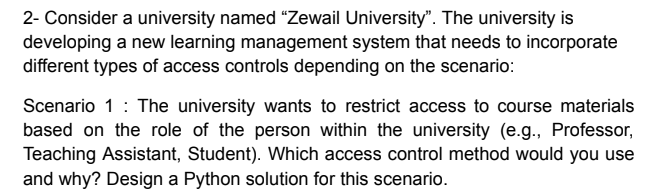

## Scenario 1

RBAC ,as it gives access based on the position or rule in the organization

In [177]:
import pandas as pd

roles = ['Professor', 'Teaching Assistant', 'Student']
permissions = ['read', 'write', 'delete']

rbac_df = pd.DataFrame(columns=['Role'] + permissions)
rbac_df['Role'] = roles
rbac_df.set_index('Role', inplace=True)

rbac_df.loc['Professor'] = 1
rbac_df.loc['Teaching Assistant', ['read', 'write']] = 1
rbac_df.loc['Student', 'read'] = 1

print(rbac_df)


                   read write delete
Role                                
Professor             1     1      1
Teaching Assistant    1     1    NaN
Student               1   NaN    NaN


## Scenario 2

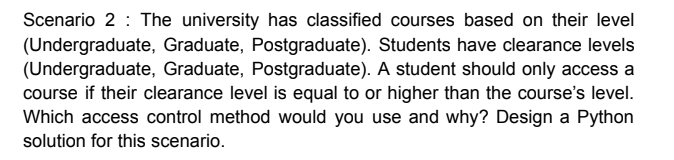

Abac:accessing to resources based on attributes associated with users, objects, and the environment

In [178]:
!pip install py_abac

In [179]:
import pandas as pd

In [180]:
from py_abac import PDP, Policy, AccessRequest
from py_abac.storage.memory import MemoryStorage

clearance_levels = ["Undergraduate", "Graduate", "Postgraduate"]
course_levels = ["Undergraduate", "Graduate", "Postgraduate"]

In [181]:
policies = []
for student_clearance_level in clearance_levels:
    for course_level in course_levels:
        if clearance_levels.index(student_clearance_level) >= course_levels.index(course_level):
            policy_json = {
                "uid": f"{student_clearance_level}_{course_level}_policy",
                "description": f"Allows students with clearance level '{student_clearance_level}' to access courses at level '{course_level}' or lower.",
                "effect": "allow",
                "rules": {
                    "subject": {"$.clearance_level": {"condition": "Equals", "value": student_clearance_level}},
                    "resource": {"$.course_level": {"condition": "Equals", "value": course_level}}
                },
                "targets": {},
                "priority": 0
            }
            policy = Policy.from_json(policy_json)
            policies.append(policy)

storage = MemoryStorage()
for policy in policies:
    storage.add(policy)

pdp = PDP(storage)

access_request_json = {
    "subject": {"id": "", "attributes": {"clearance_level": "Graduate"}},
    "resource": {"id": "", "attributes": {"course_level": "Undergraduate"}},
    "action": {"id": "", "attributes": {"operation": "access"}}
}

access_request = AccessRequest.from_json(access_request_json)

# Check if access request is allowed using the PDP
if pdp.is_allowed(access_request):
    print("Access granted.")
else:
    print("Access denied.")


Access granted.


## Scenario 3

RBAC ,as it gives access based on the position or rule in the organization

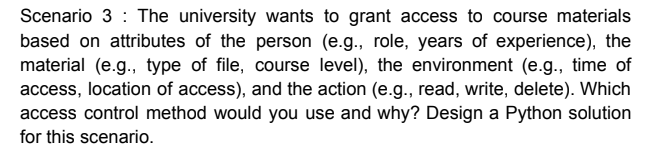

In [182]:
roles = ['student', 'instructor', 'TA']
file_types = ['pdf', 'docx', 'pptx']
course_levels = ['beginner', 'intermediate', 'advanced']
times_of_access = ['day', 'night']
locations_of_access = ['campus', 'off-campus']
actions = ['read', 'write', 'delete']

access_control_df = pd.DataFrame(columns=['Role', 'Years_of_Experience'] + file_types + course_levels + times_of_access + locations_of_access + actions)
access_control_df['Role'] = roles
access_control_df.set_index('Role', inplace=True)

access_control_df.loc['student', 'pdf':'pptx'] = 1
access_control_df.loc['instructor', 'pdf':'pptx'] = 1
access_control_df.loc['TA', :] = 1
print(access_control_df)

           Years_of_Experience pdf docx pptx beginner intermediate advanced  \
Role                                                                          
student                    NaN   1    1    1      NaN          NaN      NaN   
instructor                 NaN   1    1    1      NaN          NaN      NaN   
TA                           1   1    1    1        1            1        1   

            day night campus off-campus read write delete  
Role                                                       
student     NaN   NaN    NaN        NaN  NaN   NaN    NaN  
instructor  NaN   NaN    NaN        NaN  NaN   NaN    NaN  
TA            1     1      1          1    1     1      1  


## Scenario 4

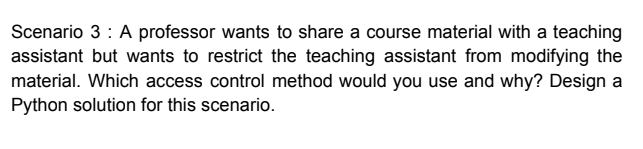

RBAC ,as it gives access based on the position or rule in the organization

In [183]:
roles = ['DR', 'TA']
permissions = ['read', 'write']

access_control_df = pd.DataFrame(columns=['Role'] + permissions)
access_control_df['Role'] = roles
access_control_df.set_index('Role', inplace=True)

access_control_df.loc['DR', 'read'] = 1
access_control_df.loc['DR', 'write'] = 1
access_control_df.loc['TA', 'read'] = 1
access_control_df.loc['TA', 'write'] = 0
print(access_control_df)

def check_access(user_role, action):
    return access_control_df.loc[user_role, action] == 1

# Test the access control
user_role = 'TA'
action = 'write'

if check_access(user_role, action):
    print("Access granted!")
else:
    print("Access denied!")


     read write
Role           
DR      1     1
TA      1     0
Access denied!


# Question 3

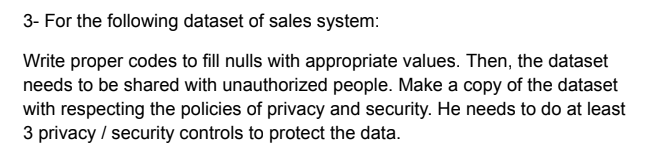

In [184]:
df = pd.read_csv('/content/sales_system.csv')

In [185]:
df

,InvoiceID,Branch,City,Customer,Gender,ProductLine,UnitPrice,Quantaty,Tax5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-84,A,Yangon,Member,Female,Health and care,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-30,C,Naypyitaw,Normal,Female,Electronics,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,NaN,3.8200,9.6
2,631-41-31,A,Yangon,Normal,Male,Sports,46.33,7,16.2155,340.5255,3/3/2019,13:23,Creditcard,324.31,4.761905,16.2155,7.4
3,123-19-11,A,Yangon,Member,Male,Health and care,58.22,8,23.2880,NaN,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-79,A,Yangon,Normal,Male,Sports,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-30,C,Naypyitaw,Normal,Male,Electronics,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-59,A,Yangon,Member,Female,Electronics,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8


*Null values Exists*

In [186]:
df.isnull().sum()

InvoiceID                  0
Branch                     0
City                       0
Customer                   0
Gender                     0
ProductLine                0
UnitPrice                  0
Quantaty                   0
Tax5%                      0
Total                      1
Date                       0
Time                       0
Payment                    0
cogs                       0
gross_margin_percentage    1
gross_income               0
Rating                     0
dtype: int64

In [187]:
df.dropna(inplace = True)

In [188]:
!pip install faker

In [189]:
import pandas as pd
import random
import numpy as np


In [190]:
!pip install anonymizedf

In [191]:
copy = df.copy()

## Masking

In [192]:
from anonymizedf.anonymizedf import anonymize

# Prepare data for anonymization
an = anonymize(copy)

# Add masked columns
an.fake_names("Customer")
an.fake_categories("Gender")
an.fake_categories("Branch")

# Drop the original columns
copy.drop(['Customer', 'Gender', 'Branch'], axis=1, inplace=True)
copy


,InvoiceID,City,ProductLine,UnitPrice,Quantaty,Tax5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,Fake_Customer,Fake_Gender,Fake_Branch
0,750-67-84,Yangon,Health and care,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Stewart Wright,Gender 1,Branch 1
2,631-41-31,Yangon,Sports,46.33,7,16.2155,340.5255,3/3/2019,13:23,Creditcard,324.31,4.761905,16.2155,7.4,Ellie Peters-Harris,Gender 2,Branch 1
4,373-73-79,Yangon,Sports,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Ellie Peters-Harris,Gender 2,Branch 1
5,699-14-30,Naypyitaw,Electronics,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,Ellie Peters-Harris,Gender 2,Branch 2
6,355-53-59,Yangon,Electronics,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,Stewart Wright,Gender 1,Branch 1


## Adding Noise

In [193]:
def add_noise(dfp, column, std = None):
    if std == None:
        std = dfp[column].std()

    withNoise = dfp[column].add(np.random.normal(0, std, dfp.shape[0]))

    copy[column] = withNoise
    return copy

perturbation = add_noise(copy, 'Total', std=100)
perturbation

,InvoiceID,City,ProductLine,UnitPrice,Quantaty,Tax5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,Fake_Customer,Fake_Gender,Fake_Branch
0,750-67-84,Yangon,Health and care,74.69,7,26.1415,587.571520,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Stewart Wright,Gender 1,Branch 1
2,631-41-31,Yangon,Sports,46.33,7,16.2155,202.576479,3/3/2019,13:23,Creditcard,324.31,4.761905,16.2155,7.4,Ellie Peters-Harris,Gender 2,Branch 1
4,373-73-79,Yangon,Sports,86.31,7,30.2085,648.309633,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Ellie Peters-Harris,Gender 2,Branch 1
5,699-14-30,Naypyitaw,Electronics,85.39,7,29.8865,634.243390,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,Ellie Peters-Harris,Gender 2,Branch 2
6,355-53-59,Yangon,Electronics,68.84,6,20.6520,334.384348,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,Stewart Wright,Gender 1,Branch 1


## Suppression

In [194]:
copy.drop(columns=['City'],inplace = True)

copy

,InvoiceID,ProductLine,UnitPrice,Quantaty,Tax5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,Fake_Customer,Fake_Gender,Fake_Branch
0,750-67-84,Health and care,74.69,7,26.1415,587.571520,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Stewart Wright,Gender 1,Branch 1
2,631-41-31,Sports,46.33,7,16.2155,202.576479,3/3/2019,13:23,Creditcard,324.31,4.761905,16.2155,7.4,Ellie Peters-Harris,Gender 2,Branch 1
4,373-73-79,Sports,86.31,7,30.2085,648.309633,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Ellie Peters-Harris,Gender 2,Branch 1
5,699-14-30,Electronics,85.39,7,29.8865,634.243390,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,Ellie Peters-Harris,Gender 2,Branch 2
6,355-53-59,Electronics,68.84,6,20.6520,334.384348,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,Stewart Wright,Gender 1,Branch 1


## Swapping

In [195]:
copy['gross_margin_percentage_swap'] = copy['gross_margin_percentage'].sample(frac=1).reset_index(drop=True)


In [196]:
copy.to_csv('modified_data.csv', index=False)